In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from utils.base_set import X_train, X_test, y_train, y_test
from utils.metrics import aucroc, auprc, accuracy

### Model Performance

accuracy: 0.8235294117647058
auprc: 0.7646684067975306


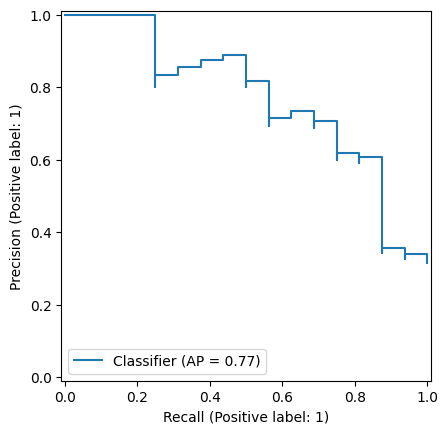

aucroc: 0.8321428571428572


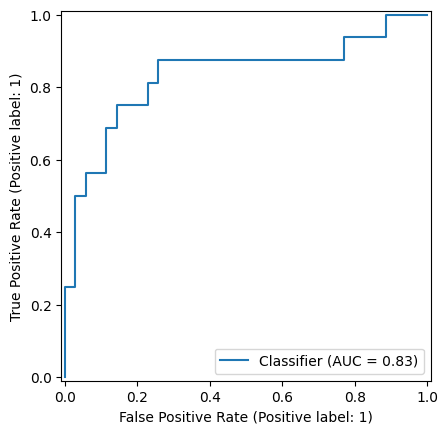

In [5]:
best_params = {'solver':'eigen', 'shrinkage':0.270007}
model = LDA(**best_params) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.decision_function(X_test)
mxp = [
    (accuracy, None, None),
    (auprc, PrecisionRecallDisplay, True), 
    (aucroc, RocCurveDisplay, True)
]

for metric, plotter, use_decision in mxp:
    y_score = y_prob if use_decision else y_pred
    print(f"{metric.__name__}: {metric(y_test, y_score)}")
    if plotter:
        plotter.from_predictions(y_test, y_score)
        plt.show()

### Competencia

In [6]:
X_held_out = pd.read_csv("../catedra/datos/X_held_out.csv", delimiter=',', encoding="utf-8").to_numpy()

y_pred = model.predict(X_held_out)
y_probas = [f'{proba:.4f}' for proba in model.predict_proba(X_held_out)[:,1]]

prediction = roc_auc_score(y_test, model.decision_function(X_test))

formated_aucroc = f'{prediction:.4f}'.split('.')[1]

file_path = f'./out/08_y_pred_held_out_{formated_aucroc}.csv'
pd.DataFrame({'output': y_probas}).to_csv(file_path, index=False)